# ПРОГНОЗИРОВАНИЕ №8.7 - ПРИБЫЛЬ (КЛАССИФИКАЦИЯ на целом фрейме данных на большем количестве деревьев)

In [1]:
import h2o
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 19 mins
H2O_cluster_timezone:,Etc/GMT
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.42.0.2
H2O_cluster_version_age:,2 months and 4 days
H2O_cluster_name:,H2O_from_python_unknownUser_l1p57n
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.210 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [2]:
#file = '/content/drive/MyDrive/Colab Notebooks/Diplom/df4eda2clean2.csv'
file = 'df2prep4regressionV8.csv'
df = h2o.import_file(file)
df = df.drop('C1')
#df = df.drop('Revenue_cat')
df = df.drop('Revenue_T')
df = df.drop('abc_xyz_class')
df

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Zip,Units,Manufacturer,MonthNo,Model_id_number,CategoryInSegment,Revenue_cat
6111,12,Natura,12,44,UrbanConvenience,Revenue_cat #49
92879,7,Pirum,12,32,RuralProductivity,Revenue_cat #43
92879,7,Pirum,12,31,RuralProductivity,Revenue_cat #43
32901,3,VanArsdel,12,94,UrbanModeration,Revenue_cat #49
84770,3,Currus,12,8,RuralSelect,Revenue_cat #49
95380,3,Abbas,12,33,UrbanModeration,Revenue_cat #49
14559,2,Natura,12,14,YouthYouth,Revenue_cat #14
16301,2,Natura,12,14,YouthYouth,Revenue_cat #14
48439,2,Quibus,12,4,RuralSelect,Revenue_cat #38
21787,2,VanArsdel,12,70,UrbanModeration,Revenue_cat #49


In [3]:
train, valid, unseen = df.split_frame(ratios=[0.7, 0.15])

In [4]:
train

Zip,Units,Manufacturer,MonthNo,Model_id_number,CategoryInSegment,Revenue_cat
92879,7,Pirum,12,31,RuralProductivity,Revenue_cat #43
32901,3,VanArsdel,12,94,UrbanModeration,Revenue_cat #49
84770,3,Currus,12,8,RuralSelect,Revenue_cat #49
95380,3,Abbas,12,33,UrbanModeration,Revenue_cat #49
16301,2,Natura,12,14,YouthYouth,Revenue_cat #14
48439,2,Quibus,12,4,RuralSelect,Revenue_cat #38
21787,2,VanArsdel,12,70,UrbanModeration,Revenue_cat #49
7503,2,Currus,12,5,MixAll Season,Revenue_cat #38
60073,2,Natura,12,26,UrbanConvenience,Revenue_cat #40
70578,1,VanArsdel,12,69,UrbanConvenience,Revenue_cat #33


In [5]:
valid

Zip,Units,Manufacturer,MonthNo,Model_id_number,CategoryInSegment,Revenue_cat
6111,12,Natura,12,44,UrbanConvenience,Revenue_cat #49
16412,1,Aliqui,12,6,UrbanExtreme,Revenue_cat #34
94065,1,Aliqui,12,6,UrbanExtreme,Revenue_cat #34
66030,1,VanArsdel,12,54,UrbanModeration,Revenue_cat #47
13433,1,VanArsdel,12,11,UrbanModeration,Revenue_cat #49
1082,1,VanArsdel,12,11,UrbanModeration,Revenue_cat #49
66067,1,VanArsdel,12,11,UrbanModeration,Revenue_cat #49
38583,1,VanArsdel,12,11,UrbanModeration,Revenue_cat #49
7206,1,Currus,12,24,UrbanExtreme,Revenue_cat #36
17408,1,VanArsdel,12,12,UrbanModeration,Revenue_cat #49


In [6]:
unseen

Zip,Units,Manufacturer,MonthNo,Model_id_number,CategoryInSegment,Revenue_cat
92879,7,Pirum,12,32,RuralProductivity,Revenue_cat #43
14559,2,Natura,12,14,YouthYouth,Revenue_cat #14
33126,2,Natura,12,18,UrbanModeration,Revenue_cat #49
60101,1,Aliqui,12,5,UrbanExtreme,Revenue_cat #38
73942,1,Aliqui,12,6,UrbanExtreme,Revenue_cat #34
78947,1,VanArsdel,12,54,UrbanModeration,Revenue_cat #47
47023,1,VanArsdel,12,54,UrbanModeration,Revenue_cat #47
6093,1,VanArsdel,12,54,UrbanModeration,Revenue_cat #47
48656,1,VanArsdel,12,54,UrbanModeration,Revenue_cat #47
70506,1,VanArsdel,12,54,UrbanModeration,Revenue_cat #47


# Тренировка модели

In [7]:
from h2o.estimators import H2OGradientBoostingEstimator

response_col = "Revenue_cat"

distribution = "multinomial"

predictors = ["Zip","Units","Manufacturer","MonthNo","Model_id_number", "CategoryInSegment"]

gbm = H2OGradientBoostingEstimator(nfolds=3,
                                   ntrees=75,
                                   distribution=distribution)

gbm.train(x=predictors,
          y=response_col,
          training_frame=train,
          validation_frame=valid)

gbm Model Build progress: |████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_model_python_1695987519015_3


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    75                 3675                        1.62369e+06            5            5            4.83537       1             32            30.4155

ModelMetricsMultinomial: gbm
** Reported on train data. **

MSE: 0.3745639841125438
RMSE: 0.6120163266715553
LogLoss: 1.085160363514275
Mean Per-Class Error: 0.4012321378617746
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
Revenue_cat #1    Revenue_cat #10    Revenue_cat #11    Revenue_cat #12    Revenue_cat #13    Revenue_cat #14    Revenue_cat #15    Revenue_cat #16    Revenue_cat #17    Revenue_cat #18    Revenue_cat #19    Revenue_cat #2    Revenue_cat #20    Revenue_cat #21    Revenue_cat #22    Revenue_cat #23    Revenue_cat #24    Revenue_cat #25    Revenue_cat #26    Revenue_cat #27    Revenue_cat #28    Revenue_cat #29    Revenue_cat #3    Revenue_cat #30    Revenue_cat #31    Revenue_cat #32    Revenue_cat #33    Revenue_cat #34    Revenue_cat #35    Revenue_cat #36    Revenue_cat #37    Revenue_cat #38    Revenue_cat #39    Revenue_cat #4    Revenue_cat #40    Revenue_cat #41    Revenue_cat #42    Revenue_cat #43    Revenue_cat #44    Revenue_cat #45    Revenue_cat #46    Revenue_cat #47    Revenue_cat #48    Revenue_cat #49    Revenue_cat #5    Revenue_cat #6    Revenue_cat #7    Revenue_cat #8    Revenue_cat #9    Error                  Rate
----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  ----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  ----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  ----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  -----------------  ----------------  ----------------  ----------------  ----------------  ----------------  ---------------------  -----------------
16108.0           0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                1.0                0.0                0.0               0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0               0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0               0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0                0.0               0.0               0.0               2.0     

In [8]:
confusion_matrix = gbm.confusion_matrix(train)
confusion_matrix

Revenue_cat #1,Revenue_cat #10,Revenue_cat #11,Revenue_cat #12,Revenue_cat #13,Revenue_cat #14,Revenue_cat #15,Revenue_cat #16,Revenue_cat #17,Revenue_cat #18,Revenue_cat #19,Revenue_cat #2,Revenue_cat #20,Revenue_cat #21,Revenue_cat #22,Revenue_cat #23,Revenue_cat #24,Revenue_cat #25,Revenue_cat #26,Revenue_cat #27,Revenue_cat #28,Revenue_cat #29,Revenue_cat #3,Revenue_cat #30,Revenue_cat #31,Revenue_cat #32,Revenue_cat #33,Revenue_cat #34,Revenue_cat #35,Revenue_cat #36,Revenue_cat #37,Revenue_cat #38,Revenue_cat #39,Revenue_cat #4,Revenue_cat #40,Revenue_cat #41,Revenue_cat #42,Revenue_cat #43,Revenue_cat #44,Revenue_cat #45,Revenue_cat #46,Revenue_cat #47,Revenue_cat #48,Revenue_cat #49,Revenue_cat #5,Revenue_cat #6,Revenue_cat #7,Revenue_cat #8,Revenue_cat #9,Error,Rate
16108.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0001862,"3 / 16,111"
0.0,8782.0,366.0,7.0,36.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,480.0,2501.0,0.2804588,"3,423 / 12,205"
0.0,2986.0,11562.0,314.0,252.0,13.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,62.0,363.0,0.2575135,"4,010 / 15,572"
0.0,2260.0,2571.0,3430.0,2569.0,383.0,20.0,76.0,7.0,0.0,95.0,0.0,14.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0,6.0,749.0,0.72,"8,820 / 12,250"
0.0,557.0,1608.0,641.0,10650.0,707.0,3.0,2.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,26.0,0.0,1.0,23.0,0.0,0.2517915,"3,584 / 14,234"
0.0,68.0,2498.0,286.0,1038.0,9324.0,310.0,49.0,10.0,1.0,1.0,4.0,0.0,1.0,3.0,0.0,39.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,3.0,18.0,1.0,0.3178227,"4,344 / 13,668"
0.0,8.0,701.0,211.0,81.0,1574.0,10735.0,1923.0,100.0,2.0,0.0,2.0,2.0,59.0,0.0,68.0,158.0,5.0,0.0,0.0,0.0,3.0,0.0,0.0,15.0,0.0,1.0,31.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.0,153.0,5.0,0.3236943,"5,138 / 15,873"
0.0,0.0,0.0,17.0,2.0,271.0,1718.0,8672.0,684.0,56.0,0.0,0.0,0.0,0.0,2.0,1.0,7.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0,0.0,187.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2.0,1.0,0.0,17.0,51.0,7.0,1.0,0.2598788,"3,045 / 11,717"
0.0,4.0,1.0,61.0,101.0,3.0,1022.0,2409.0,7906.0,2037.0,3.0,0.0,404.0,46.0,44.0,0.0,47.0,129.0,5.0,6.0,0.0,1.0,0.0,0.0,12.0,0.0,0.0,80.0,0.0,1.0,3.0,2.0,0.0,0.0,2.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,41.0,4.0,0.0,0.0,0.4501704,"6,473 / 14,379"
0.0,0.0,29.0,43.0,1.0,107.0,67.0,222.0,2291.0,13187.0,837.0,0.0,712.0,86.0,79.0,33.0,114.0,30.0,3.0,9.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0,0.0,6.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,21.0,0.0,0.0,35.0,2.0,0.0,0.0,2.0,1.0,19.0,0.2660433,"4,780 / 17,967"


In [9]:
hit_ratio_table = gbm.hit_ratio_table() # <- Default: return training metrics
hit_ratio_table

k,hit_ratio
1,0.6099317
2,0.8283495
3,0.9143909
4,0.9502046
5,0.9691557
6,0.9795077
7,0.9860874
8,0.9895494
9,0.9915245
10,0.9926702


In [10]:
hit_ratio_table1 = gbm.hit_ratio_table(train=True,
                                       valid=True,
                                       xval=True)
hit_ratio_table1

{'train': Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.609932
2    0.828349
3    0.914391
4    0.950205
5    0.969156
6    0.979508
7    0.986087
8    0.989549
9    0.991525
10   0.99267,
 'valid': Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.604505
2    0.824384
3    0.911522
4    0.947554
5    0.966614
6    0.977848
7    0.984582
8    0.988402
9    0.990546
10   0.991652,
 'xval': Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.60392
2    0.823448
3    0.910976
4    0.947808
5    0.966431
6    0.977922
7    0.984101
8    0.987999
9    0.990002
10   0.991305}

In [11]:
mean_per_class_error = gbm.mean_per_class_error() # <- Default: return training metric
mean_per_class_error

0.4012321378617746

In [12]:
mean_per_class_error1 = gbm.mean_per_class_error(train=True,
                                                 valid=True,
                                                 xval=True)
mean_per_class_error1

{'train': 0.4012321378617746,
 'valid': 0.40685183104081013,
 'xval': 0.4073465856151466}

In [13]:
multinomial_auc_table = gbm.multinomial_auc_table() # <- Default: return training metric
multinomial_auc_table

"AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains)."

In [14]:
multinomial_aucpr_table = gbm.multinomial_aucpr_table() # <- Default: return training metric
multinomial_aucpr_table

"AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains)."

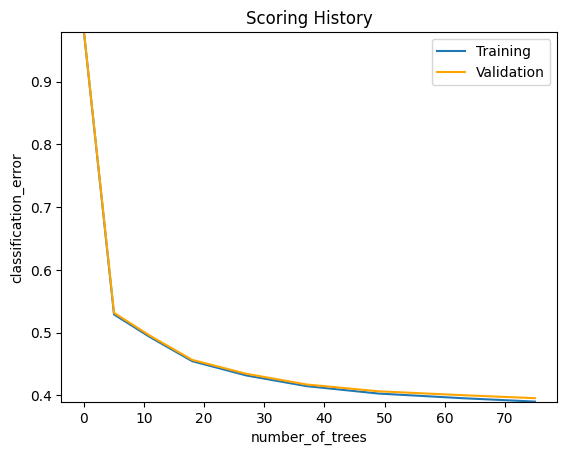

In [15]:
gbm.plot(metric="AUTO", timestep="AUTO")